# 2.2 Natural Language Processing with Cluster
# / Google Play Store Reviews

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/denise/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/denise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/denise/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Preprocess Text  - Function
- Reused function from 1.2 Amazon Alexa Reviews.
- Cleaning of symbols, case, and removal of stopwords. 
- Review text is tokenized, then used lemmatization to reduce variants of the same word. Joined the words back into strings.

Reference https://towardsdatascience.com/a-gentle-introduction-to-natural-language-processing-e716ed3c0863


In [2]:
def text_processing(review):
    
    #cleaning html tags and words
    review = re.sub(re.compile('<.*?>'), '', review)
    review = re.sub('[^A-Za-z0-9]+', ' ', review)
    
    #lowercase
    review = review.lower()
    #tokenization
    tokens = nltk.word_tokenize(review)
    #remove stopwords
    review = [word for word in tokens if word not in stop_words]
    #lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    #
    review = ' '.join(review)
    
    return review

# Explore and Clean Data
Explored both datasets. Identified key columns and data type.
> **App Ratings** googleplaystore.csv 
>    * App [String]
>    * Rating [Float]
>
> **Customer Reviews** googleplaystore_user_reviews.csv 
>    * App [String]
>    * Translated_Review [String]
>    * Sentiment [String]

Cleaned datasets
> * Made column headers lowercase
> * Summed NaNs then explored rows with NaNs
> * Dropped rows with NaNs for key columns

In [3]:
df = pd.read_csv('data/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
reviews = pd.read_csv('data/googleplaystore_user_reviews.csv')
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
#clean column headers
apps.columns = apps.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
apps.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#clean column headers
reviews.columns = reviews.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
reviews.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
apps.isna().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [8]:
reviews.isna().sum()

app                           0
translated_review         26868
sentiment                 26863
sentiment_polarity        26863
sentiment_subjectivity    26863
dtype: int64

In [9]:
#explore nans in apps
apps[apps.rating.isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [10]:
#explore nans in reviews
reviews[reviews.sentiment.isna()]

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [11]:
#drop rows where translated_review and sentiment were nan (all)
reviews = reviews.dropna(subset=['translated_review', 'sentiment'])
reviews.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [12]:
#check that after cleaning, negative reviews still existed, and how many
reviews[reviews["sentiment"] == 'Negative']

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


## Join Datasets
- Merged CSVs on App name
- Explored new NaNs
- Dropped rows with NaN for Rating and Review

In [13]:
reviews_app = pd.merge(reviews, apps, how='left', on='app')

reviews_app.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [14]:
reviews_app[reviews_app.rating.isna()]

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
388,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.600000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Almost mobile phone,Neutral,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Very effective, efficient convenient find avai...",Positive,0.626667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Easy intuitive,Positive,0.433333,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72565,Home Street – Home Design Game,There many things,Positive,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72566,Home Street – Home Design Game,This game fun also little boring okay game u w...,Negative,-0.197917,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72567,Home Street – Home Design Game,It nice I would recommend would work without n...,Positive,0.311111,0.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72568,Home Street – Home Design Game,I anything say I love,Positive,0.500000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
reviews_app[reviews_app.rating.isna()]

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
388,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.600000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Almost mobile phone,Neutral,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Very effective, efficient convenient find avai...",Positive,0.626667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Easy intuitive,Positive,0.433333,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72565,Home Street – Home Design Game,There many things,Positive,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72566,Home Street – Home Design Game,This game fun also little boring okay game u w...,Negative,-0.197917,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72567,Home Street – Home Design Game,It nice I would recommend would work without n...,Positive,0.311111,0.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72568,Home Street – Home Design Game,I anything say I love,Positive,0.500000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
reviews_app = reviews_app.dropna(subset=['rating', 'reviews'])
reviews_app.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


# Prepare Data for Modeling

### Assign Categorical Predictors
- Used Positive/Negative sentiment to create an indicator column with value of 1 Positive and 0 Negative

In [18]:
reviews_app['indicator'] = (reviews_app.sentiment == "Positive").astype(int)
reviews_app.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,indicator
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1


In [19]:
reviews_app['processed_review'] = reviews_app['translated_review'].apply(lambda review: text_processing(review))
reviews_app.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,indicator,processed_review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,like eat delicious food cooking food case 10 b...
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,like eat delicious food cooking food case 10 b...
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,help eating healthy exercise regular basis
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,help eating healthy exercise regular basis
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,work great especially going grocery store


In [20]:
reviews_app[reviews_app.duplicated()]
reviews_app.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,indicator,processed_review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,like eat delicious food cooking food case 10 b...
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,like eat delicious food cooking food case 10 b...
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,help eating healthy exercise regular basis
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,help eating healthy exercise regular basis
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,work great especially going grocery store


In [21]:
reviews_app.drop_duplicates(keep='first')
reviews_app.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,indicator,processed_review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,like eat delicious food cooking food case 10 b...
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,like eat delicious food cooking food case 10 b...
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,help eating healthy exercise regular basis
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,help eating healthy exercise regular basis
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,1,work great especially going grocery store


In [22]:
np.mean([len(i.split(" ")) for i in reviews_app['processed_review']])

17.893145550257696

## Training / Test Sets

- Assigned indicator (1 or 0) as y to be predicted
- Split data into Train and Test data
- Used processed_ngrams as the x - the text to be analyzed and used to predict positive or negative review

In [23]:
from sklearn.model_selection import train_test_split
data = reviews_app.copy()
y = data['indicator'].values
data.drop(['indicator'], axis = 1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)
print("Train data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)

Train data: (50796, 18) (50796,)
Test data: (21770, 18) (21770,)


### Text vectorization
Converting the preprocessed text to numerical data

#### Bag of words
* Dump all reviews into a bag, extract each unique word to build a dictionary. Review x Dictionary matrix allows for numeric.
Rows: Review ('document')
Columns:each word in the dictionary ('text corpus')

This can provide most frequent words.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=10)

x_train_review_bow = vect.fit_transform(x_train['processed_review'])
x_test_review_bow = vect.transform(x_test['processed_review'])

print('x_train_review_bow shape: ', x_train_review_bow.shape)
print('x_test_review_bow shape: ', x_test_review_bow.shape)

x_train_review_bow shape:  (50796, 5237)
x_test_review_bow shape:  (21770, 5237)


#### Term Frequency - Inverse Document Frequency
Probability of finding the word in a document

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,3))

x_train_review_tfidf = vectorizer.fit_transform(x_train['processed_review'])
x_test_review_tfidf = vectorizer.transform(x_test['processed_review'])
print('x_train_review_tfidf shape: ', x_train_review_tfidf.shape)
print('x_test_review_tfidf shape: ', x_test_review_tfidf.shape)

x_train_review_tfidf shape:  (50796, 34707)
x_test_review_tfidf shape:  (21770, 34707)


# Model Validation

### Multinomial Naive bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(x_train_review_bow, y_train)
y_pred = clf.predict(x_test_review_bow)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8397335783187874


In [27]:
clf = MultinomialNB(alpha=1)
clf.fit(x_train_review_tfidf, y_train)

y_pred = clf.predict(x_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8539274230592558


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1')
clf.fit(x_train_review_tfidf, y_train)

y_pred = clf.predict(x_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy:  0.961644464859899


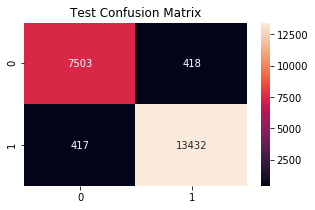

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [30]:
reviews_app['indicator'].value_counts(normalize=True)

1    0.636166
0    0.363834
Name: indicator, dtype: float64

In [31]:
#source aaron
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7921
           1       0.97      0.97      0.97     13849

    accuracy                           0.96     21770
   macro avg       0.96      0.96      0.96     21770
weighted avg       0.96      0.96      0.96     21770



In [36]:
#next step print 'Positive' if 1 'Negative' if 0
a = vectorizer.transform([text_processing('I like things and stuff. But kind of hate this. CrapNotebook
> [2.1 Google Play Store App Reviews](2.1googleplaystore.ipynb) [Final Project].')])
clf.predict(a)

array([0])

In [33]:
#testing my natural language, expect 1
a = vectorizer.transform([text_processing("It does what it's meant to.")])
clf.predict(a)

array([0])

In [34]:
#testing addition of positive word, expect 1
a = vectorizer.transform([text_processing("It does what it's meant to. Good enough.")])
clf.predict(a)

array([1])

In [35]:
#testing someone elses natural language, expect negative 0
a = vectorizer.transform([text_processing("I did not enjoy this product")])
clf.predict(a)

array([1])